In [192]:
def strategy_kelly_meta(kelly_crit : float):
    def strategy_kelly(bankroll : float, previous_bankroll : float):
        # we reserve the existence of previous bankroll here for strategy that involve decision making after previous gain/loss
        return bankroll*kelly_crit
    return strategy_kelly

def strategy_lintang(bankroll : float, previous_bankroll : float):
    #if bankroll > 3*10**9:
    #    return bankroll*0.30
    if bankroll > 10*10**9:
        return 10*10**9*0.8
    return bankroll*0.80

def simulate_until(init_bankroll, strategy, n_of_games):

    final_bankrolls = []
    def play(bank_roll, n_of_games_left, strategy):
        if n_of_games_left == 0:
            final_bankrolls.append(bank_roll)
            return
        bank_roll_exposed = strategy(bank_roll, bank_roll)
        bank_roll_spare = bank_roll-bank_roll_exposed
        br_win = bank_roll_exposed*3 + bank_roll_spare
        br_lose = bank_roll_exposed*0.7 + bank_roll_spare
        play(br_win, n_of_games_left-1, strategy)
        play(br_lose, n_of_games_left-1, strategy)

    play(init_bankroll, n_of_games, strategy)
    return final_bankrolls

import random
def simulate_with_winning_probs(init_bankroll, strategy, n_of_games, n_of_simulation, probability_of_winning, win_gain=3,lose_gain=0.7):
    final_bankrolls = []
    def play(bank_roll_exposed, bank_roll_spare, n_of_games_left, strategy):
        if n_of_games_left == 0:
            final_bankrolls.append(bank_roll_exposed+bank_roll_spare)
            return

        if random.random() <= probability_of_winning:
            br_next = bank_roll_exposed*win_gain + bank_roll_spare
        else:
            br_next = bank_roll_exposed*lose_gain + bank_roll_spare

        if br_next <= 0:
            final_bankrolls.append(0.0)
            return

        br_next_exposed = strategy(br_next, bank_roll_exposed+bank_roll_spare)
        br_next_spare = br_next - br_next_exposed
        play(br_next_exposed, br_next_spare, n_of_games_left-1, strategy)

    expose = strategy(init_bankroll,init_bankroll)
    spare = init_bankroll-expose
    print(init_bankroll,"=",expose,"+",spare)
    for _ in range(n_of_simulation):
        play(expose,spare, n_of_games, strategy)
    return final_bankrolls

final_bankrolls = simulate_until(10000000.0,strategy_kelly_meta(0.8),7)

In [193]:
import numpy as np
val, counts = np.unique(final_bankrolls,return_counts=True)

<BarContainer object of 17 artists>

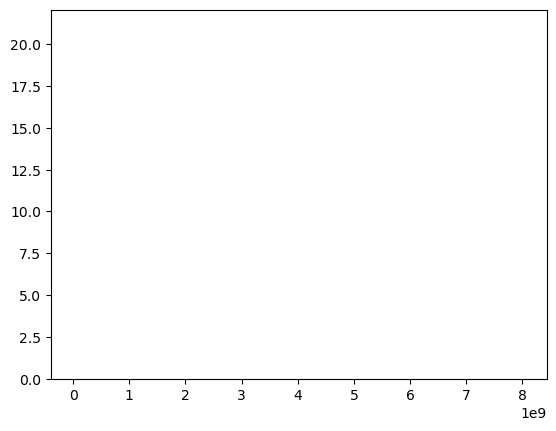

In [194]:
import matplotlib.pyplot as plt


#plt.hist(final_bankrolls,)
plt.bar(val,counts)
#plt.xscale('log')
#plt.yscale('log')

In [195]:
val, counts

(array([1.46451946e+06, 5.01019814e+06, 5.01019814e+06, 1.71401515e+07,
        1.71401515e+07, 1.71401515e+07, 5.86373605e+07, 5.86373605e+07,
        5.86373605e+07, 5.86373605e+07, 2.00601497e+08, 2.00601497e+08,
        2.00601497e+08, 6.86268278e+08, 6.86268278e+08, 2.34775990e+09,
        8.03181018e+09]),
 array([ 1,  1,  6,  1, 15,  5,  6, 16,  9,  4, 21, 10,  4, 11, 10,  7,  1]))

In [196]:
counts.sum()

128

In [197]:
for v,c in zip(val,counts):
    print(int(v),c/128)

1464519 0.0078125
5010198 0.0078125
5010198 0.046875
17140151 0.0078125
17140151 0.1171875
17140151 0.0390625
58637360 0.046875
58637360 0.125
58637360 0.0703125
58637360 0.03125
200601496 0.1640625
200601496 0.078125
200601496 0.03125
686268277 0.0859375
686268277 0.078125
2347759897 0.0546875
8031810176 0.0078125


2.4166666666666665
500000000 = 400000000.0 + 100000000.0


<Axes: ylabel='Count'>

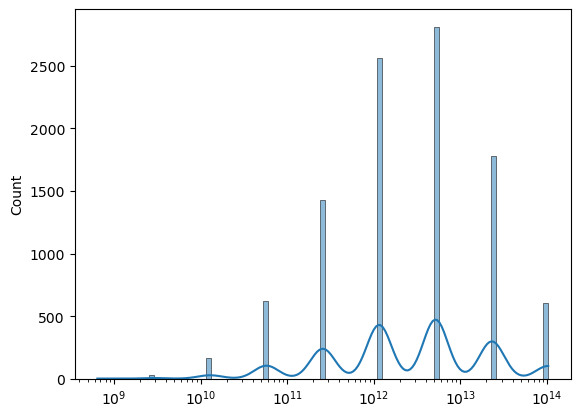

In [219]:
import seaborn as sns
probability_of_win = 0.75
probability_of_lose = 1-probability_of_win
gain_win = 3.0
gain_lose = 0.3
kelly_c = probability_of_win/gain_lose - probability_of_lose/gain_win
print(kelly_c)
initial_bankroll = 500*10**6
number_of_simulation = 10000
final_bankrolls_with_probs = simulate_with_winning_probs(initial_bankroll,
                                                         strategy_kelly_meta(0.8),
                                                         #strategy_lintang,
                                                         10,
                                                         number_of_simulation,
                                                         probability_of_win, 
                                                         1+gain_win,
                                                         1-gain_lose)
vals, counts = np.unique(final_bankrolls_with_probs,return_counts=True)
#print(vals,counts)
#sns.kdeplot(x=vals,y=counts/1000,)
sns.histplot(final_bankrolls_with_probs,kde=True,log_scale=(True,False))

In [211]:
3**10*500*10**6

29524500000000

In [214]:
total_below_1 = 0
for v,c in zip(vals,counts):
    if v<=initial_bankroll:
        total_below_1 += c

print(total_below_1/number_of_simulation)

0.0


In [213]:
81*5*10**8

40500000000